In [27]:
from preprocessing.image_preprocess import preprocess_eye, preprocess_eye_2
from preprocessing.load import get_all_filenames, get_all_test_filenames
import random
import cv2
import numpy as np
from matplotlib.pyplot import imshow
import os
from PIL import Image, ImageOps


In [28]:
%%time
from pytorch.dual_data_helper import open_image
y = Image.open(x[0])

# y = open_image(x[0])

AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [29]:
# preprocess_eye_2(y)

In [2]:
# DEBUG
# a = cv2.imread("../all_train/0/492_right.jpeg")
# imshow(a)

In [3]:
# %%time
# import glob


# os.makedirs("../all_train_300", exist_ok=True)
# for s in ["train", "val", "test"]:
#     os.makedirs(f"../all_train_300/{s}", exist_ok=True)
#     for i in range(5):
#         os.makedirs(f"../all_train_300/{s}/{i}", exist_ok=True)
    
# x = glob.glob("../all_train/*/*/*.jpeg")
# len(x)

In [10]:
%%time
import glob, os
main_test_dir = "/media/workstation/Storage/Test/fp/test"
main_dir = "/media/workstation/Storage/Test/fp/test_300"
os.makedirs(main_dir, exist_ok=True)
for i in range(5):
    os.makedirs(f"{main_dir}/{i}", exist_ok=True)
x = glob.glob(f"{main_test_dir}/*.jpeg")

x2 = glob.glob(f"{main_dir}/*.jpeg")
len(x), len(x2)

CPU times: user 141 ms, sys: 12.1 ms, total: 153 ms
Wall time: 153 ms


(53576, 53576)

In [8]:
j = 0
for i in x:
    new_filename = i.replace("test", "test_300")
    j+=1
    if j %1000 == 0:
        print("Done:", j, new_filename)
    if os.path.exists(new_filename):
        continue
    img = preprocess_eye(i)
    if img is None:
        print("Error ====")
        continue
    cv2.imwrite(filename = new_filename, img = img)

Done: 1000 /media/workstation/Storage/Test/fp/test_300/35203_left.jpeg
Done: 2000 /media/workstation/Storage/Test/fp/test_300/1621_left.jpeg
Done: 3000 /media/workstation/Storage/Test/fp/test_300/31198_right.jpeg
Done: 4000 /media/workstation/Storage/Test/fp/test_300/1668_left.jpeg


/home/workstation/fp/fyp/fyp/preprocessing/image_preprocess.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  s = scale * 1.0 / r


Error at: /media/workstation/Storage/Test/fp/test/25313_right.jpeg
Error ====
Done: 5000 /media/workstation/Storage/Test/fp/test_300/6077_right.jpeg
Done: 6000 /media/workstation/Storage/Test/fp/test_300/13497_right.jpeg
Done: 7000 /media/workstation/Storage/Test/fp/test_300/1876_right.jpeg
Done: 8000 /media/workstation/Storage/Test/fp/test_300/3152_right.jpeg
Done: 9000 /media/workstation/Storage/Test/fp/test_300/12510_right.jpeg
Done: 10000 /media/workstation/Storage/Test/fp/test_300/5820_right.jpeg
Done: 11000 /media/workstation/Storage/Test/fp/test_300/9102_right.jpeg
Done: 12000 /media/workstation/Storage/Test/fp/test_300/41982_right.jpeg
Done: 13000 /media/workstation/Storage/Test/fp/test_300/17703_left.jpeg
Done: 14000 /media/workstation/Storage/Test/fp/test_300/38631_left.jpeg
Done: 15000 /media/workstation/Storage/Test/fp/test_300/20580_right.jpeg
Done: 16000 /media/workstation/Storage/Test/fp/test_300/25590_right.jpeg
Done: 17000 /media/workstation/Storage/Test/fp/test_300/25

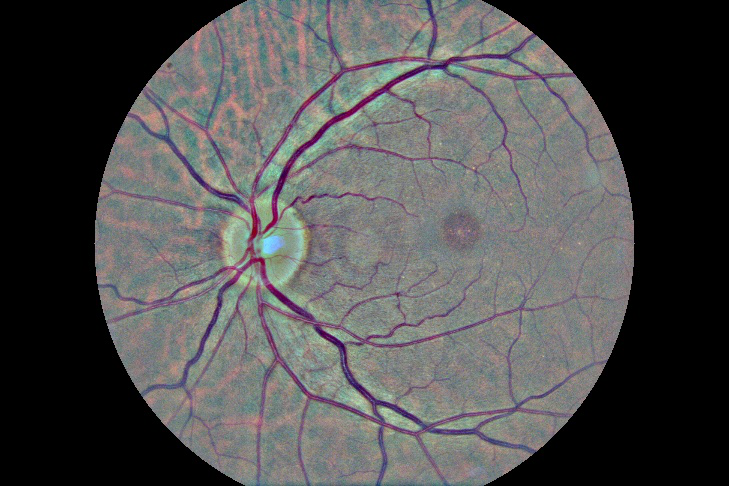

In [20]:
from PIL import Image
Image.open("/media/workstation/Storage/Test/fp/test_300/22827_right.jpeg")

In [10]:
# copy error file directly without preprocessing
import shutil
d = ["/media/workstation/Storage/Test/fp/test/25313_right.jpeg", "/media/workstation/Storage/Test/fp/test/27096_right.jpeg"]
for i in d:
    new_filename = i.replace("test", "test_300")
    shutil.copy2(i, new_filename)

In [12]:
import pandas as pd
s = "/media/workstation/Storage/Test/fp/data/sampleSubmission.csv"
df = pd.read_csv(s)
import joblib
y = joblib.load("y_pred_test_final.pkl")
x = joblib.load("X_test_final.pkl")
test_df = pd.read_csv("final_test.csv")

In [14]:
x.shape

(26788, 2000)

In [15]:
df.shape

(53576, 2)

In [79]:
test_df["y_pred"] = y


In [80]:
test_df["image"] = test_df["files_x"].apply(lambda x: os.path.basename(x).split(".")[0])
test_df2 = test_df[["image", "y_pred"]]

In [81]:
test_df["image"]

0       35747_left
1        2727_left
2       21153_left
3       31283_left
4       44124_left
           ...    
9995    25892_left
9996    41092_left
9997    16295_left
9998    13365_left
9999    30616_left
Name: image, Length: 10000, dtype: object

In [82]:
df2 = pd.merge(df, test_df2, left_on = "image", right_on = "image", how = "left")

In [83]:
(df["image"] == "35747_left").any()

True

In [84]:
df2.sort_values("y_pred")

,image,level,y_pred
8,5_left,0,0
34380,28481_left,0,0
34382,28482_left,0,0
34392,28489_left,0,0
34394,28490_left,0,0
...,...,...,...
53571,44346_right,0,NaN
53572,44350_left,0,NaN
53573,44350_right,0,NaN
53574,44351_left,0,NaN


In [88]:
df2["y_pred"].sort_values()

8          0
34380      0
34382      0
34392      0
34394      0
        ... 
53571    NaN
53572    NaN
53573    NaN
53574    NaN
53575    NaN
Name: y_pred, Length: 53576, dtype: object

In [19]:
# j = 0
# for i in x:
#     new_filename = i.replace("all_train", "all_train_300")
#     j+=1
#     if j %1000 == 0:
#         print("Done:", j, new_filename)
#     if os.path.exists(new_filename):
#         continue
#     img = preprocess_eye(i)
#     if img is None:
#         print("Error ====")
#         continue
#     cv2.imwrite(filename = new_filename, img = img)

Done: 1000 ../all_train_300/val/0/11808_left.jpeg
Done: 2000 ../all_train_300/val/0/17356_left.jpeg
Done: 3000 ../all_train_300/val/0/19093_right.jpeg
Done: 4000 ../all_train_300/val/0/11431_left.jpeg
Done: 5000 ../all_train_300/val/0/5459_right.jpeg
Done: 6000 ../all_train_300/val/2/15636_right.jpeg
Done: 7000 ../all_train_300/val/1/34655_right.jpeg
Done: 8000 ../all_train_300/train/0/15192_left.jpeg
Done: 9000 ../all_train_300/train/0/12822_left.jpeg
Done: 10000 ../all_train_300/train/0/44217_left.jpeg
Done: 11000 ../all_train_300/train/0/29466_left.jpeg
Done: 12000 ../all_train_300/train/0/44007_right.jpeg
Done: 13000 ../all_train_300/train/0/31580_right.jpeg
Error at: ../all_train/train/0/492_right.jpeg
Error ====
Done: 14000 ../all_train_300/train/0/16946_left.jpeg
Done: 15000 ../all_train_300/train/0/2815_left.jpeg
Done: 16000 ../all_train_300/train/0/9307_left.jpeg
Done: 17000 ../all_train_300/train/0/44018_left.jpeg
Done: 18000 ../all_train_300/train/0/6760_right.jpeg
Done: 190

In [5]:
# %%time
# os.makedirs("../test_300", exist_ok=True)
    
# x = get_all_test_filenames("../test")
# j = 0
# for i in x:
#     new_filename = i.replace("test", "test_300")
#     j+=1
#     if j %1000 == 0:
#         print("Done:", j, new_filename)
#     if os.path.exists(new_filename):
#         continue
#     img = preprocess_eye(i)
#     if img is None:
#         print("Error ====")
#         continue
#     cv2.imwrite(filename = new_filename, img = img)
    
    

CPU times: user 91 µs, sys: 0 ns, total: 91 µs
Wall time: 62.2 µs


20 0.4761496804162206


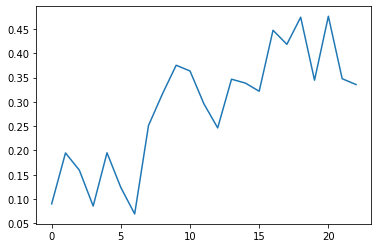

In [18]:
import pandas as pd

md = "/media/workstation/Storage/Test/Dual_AL/dual_al_test_v18/step_022"
df=pd.read_csv(f"{md}/result_2.csv")
print(df["kappa"].argmax(),df["kappa"].max())
df["kappa"].plot()

In [24]:
s = "/media/workstation/Storage/Test/fp/data/sampleSubmission.csv"
sdf = pd.read_csv(s)
print(sdf)

             image  level
0           1_left      0
1          1_right      0
2           2_left      0
3          2_right      0
4           3_left      0
...            ...    ...
53571  44346_right      0
53572   44350_left      0
53573  44350_right      0
53574   44351_left      0
53575  44351_right      0

[53576 rows x 2 columns]


In [26]:
s = "./submission_test.csv"
sdf = pd.read_csv(s)
print(sdf)

          image  level
0    35747_left      0
1     2727_left      1
2    21153_left      0
3    31283_left      0
4    44124_left      0
..          ...    ...
95  15416_right      0
96  28028_right      0
97  13491_right      0
98   6540_right      0
99  40445_right      0

[100 rows x 2 columns]


In [33]:
import joblib
d = joblib.load("dual_features/packet_dual.pkl")
d[2].shape

(60, 2000)